# Trabalho 2 - teorema central do limite

Autora:
*   Luiza Lober de Souza Piva, nUSP: 9302292

Este trabalho e os resultados salvos também se encontram na página https://github.com/luizalober/doc-disciplinas/tree/main/estatistica-2s2022/trabalho-2

### Configurações

In [43]:
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
#Classe contendo os parâmetros de interesse

class param:
  #Exponencial
  exp = [0.5, 1, 5]   #parametros dados
  exp_beta = [2, 1, 0.2]    #parâmetros convertidos para a implementação do numpy
  exp_tam = [20, 100, 500, 1000]    #tamanhos amostrais

  amostragem = 100    #dada para o exercício
  amostragem_grande = 10000   #para a Q2.

  seed = 42

## Funções para graficar

In [45]:
#Primeiro, inicializa o gerador de números aleatórios com uma semente
np.random.seed(param.seed)

In [46]:
#Gráficos

def CalculaGaussianas(coluna):
  '''
  Calculo da gaussiana associada ao histograma em questão.
  Para ser utilizada com a função seguinte.
  '''
  mean = coluna.mean()
  std = coluna.std()
  x_pdf = np.linspace(mean-4*std, mean+4*std, 200)    #considera 4 desv. pad. da média e 200 pontos
  y_pdf = sp.norm.pdf(x_pdf, mean, std)

  return x_pdf, y_pdf


def GraficaMediasEGaussianas(df, selecao):
  '''
  Faz os gráficos pedidos para a questão 4. 
  selecao é um vetor de três itens contendo o índice das colunas a serem graficadas.
  -> ao longo do código, uso 3 colunas em sequência, que são os 3 parâmetros da exp.
  -> testados.
  '''

  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=False)

  coluna_1 = df.iloc[:, selecao[0]]
  axs[0].hist(coluna_1, density=True, color = 'darkorchid')
  x_pdf, y_pdf = CalculaGaussianas(coluna_1)
  axs[0].plot(x_pdf, y_pdf, 'r', lw=2)
  axs[0].set_ylabel('Médias,' + ' ' + df.columns[selecao[0]])

  coluna_2 = df.iloc[:, selecao[1]]
  axs[1].hist(coluna_2, density=True, color = 'lightpink')
  x_pdf, y_pdf = CalculaGaussianas(coluna_2)
  axs[1].plot(x_pdf, y_pdf, 'r', lw=2)
  axs[1].set_ylabel('Médias,' + ' ' + df.columns[selecao[1]])

  coluna_3 = df.iloc[:, selecao[2]]
  axs[2].hist(coluna_3, density=True, color = 'mediumturquoise')
  x_pdf, y_pdf = CalculaGaussianas(coluna_3)
  axs[2].plot(x_pdf, y_pdf, 'r', lw=2)
  axs[2].set_ylabel('Médias,' + ' ' + df.columns[selecao[2]])

  #Descobre a amostragem a ser plotada e cria a legenda
  a = expo_mean.columns[selecao[0]]
  a = a.split(',')
  a = str(a[0])
  a = a.split(':')
  a[1]

  fig.tight_layout()
  fig.text(0.5, 1.025, 'Tamanho amostral' + ' ' + str(a[1]), ha='center')
  plt.show()

## Q1. Simule o resultado do Teorema Central do Limite

**Gere 100 amostras da Exponencial com parâmetro = (.5,1,5) de tamanho n (= 20, 100, 500, 1000)**

É importante definir a distribuição que é implementada pela biblioteca que iremos utilizar. [No numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html?highlight=exponential#numpy.random.Generator.exponential), a distribuição exponencial é dada por:

$$f(x; 1/\beta) = \frac{1}{\beta} exp \left( - \frac{x}{\beta} \right)$$

onde $1/\beta = \lambda$. Logo, os parâmetros para essa função estão definidos como `param.exp` (originais) e `param.exp_beta` (adaptado, 1/`param.exp`). Vou utilizar esse segundo ao longo das implementações.

In [47]:
def GeraExponencial(parametro, n):
  '''
  Essa função gera valores aleatórios a partir da distribuição exponencial, como
  definido em np.random.exponential(). Os parâmetros são dados pela classe param.
  Retorna um DataFrame para o tamanho de amostra n definido.
  '''
  df = pd.DataFrame()
  for itr in range(0, param.amostragem, 1):
    df[itr] = np.random.exponential(parametro, n)
  
  return df

In [48]:
def GeraExponencialVariosParametros():
  '''
  Essa função retorna um gerador capaz de iterar sobre todos os
  parâmetros de interesse para a função exponencial. 
  Ela assume que faremos os testes em grupos de 3 variações de lambda.
  '''
  expo_res = []
  for itr in (range(0, len(param.exp_tam), 1)):
    dfs = []
    df1 = GeraExponencial(param.exp_beta[0], param.exp_tam[itr]) 
    df2 = GeraExponencial(param.exp_beta[1], param.exp_tam[itr])
    df3 = GeraExponencial(param.exp_beta[2], param.exp_tam[itr])

    dfs.extend([df1, df2, df3])
    expo_res = pd.concat(dfs, axis=1)

    yield expo_res

In [49]:
def GuardaValoresGerador():
  '''
  Aplica o iterador da função anterior
  '''
  itr = GeraExponencialVariosParametros()

  #Uma entrada para cada tamanho amostral
  #-> 0: 20 amostras/teste
  #-> 1: 100 amostras
  #-> 2: 500 amostras
  #-> 3: 1000 amostras
  resultado = [0, 1, 2, 3]
  n = 0
  for i in itr:
    resultado[n] = pd.DataFrame(i)
    n = n+1

  return resultado

In [50]:
#Gera as 4 tabelas com todos os testes de interesse
expo_all = GuardaValoresGerador()

In [51]:
#tamanho amostral 20, 100 colunas para cada valor de lambda
expo_all[0].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.938536,1.892742,0.260304,0.984261,3.977059,0.063867,3.294697,6.564020,0.917046,0.834265,...,0.071170,0.370232,0.108045,0.121539,0.045696,0.199687,0.023190,0.105909,0.102284,0.207212
1,6.020243,0.300469,1.367094,0.633121,1.952602,2.023459,4.528485,0.580123,2.001007,0.240889,...,0.021107,0.118077,0.031170,0.145969,0.197130,0.156588,0.675320,0.053400,0.588071,0.003423
2,2.633491,0.691031,0.069987,3.529116,0.803638,0.754793,0.765461,1.375319,2.007676,5.172381,...,0.063413,0.246600,0.019646,0.001498,0.088865,0.027710,0.038422,0.003969,0.104331,0.645617
3,1.825885,0.912554,4.800846,0.882454,0.131336,1.420874,0.233184,0.715861,1.534770,4.196667,...,0.338516,0.263259,0.003362,0.109874,1.087294,0.094264,0.208842,0.423044,0.295538,0.009123
4,0.339250,1.217869,0.598916,0.659606,0.744977,4.762531,0.517373,0.670499,0.189258,0.596655,...,0.095065,0.038223,0.413557,0.253218,0.130856,0.020882,0.056328,0.673997,0.132282,0.030878


In [52]:
#Salva cada tabela separadamente
#-> 20 amostras:
expo_all[0].to_csv("resultado-exponencial-20_tam_amostral.csv")
#-> 100 amostras:
expo_all[1].to_csv("resultado-exponencial-100_tam_amostral.csv")
#-> 500 amostras:
expo_all[2].to_csv("resultado-exponencial-500_tam_amostral.csv")
#-> 1000 amostras:
expo_all[3].to_csv("resultado-exponencial-1000_tam_amostral.csv")

## Q2. Gráficos das funções geradoras

*Faça um gráfico da função de distribuição de probabilidade da distribuição geradora das amostras.*

In [53]:
def NormalizaDados(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

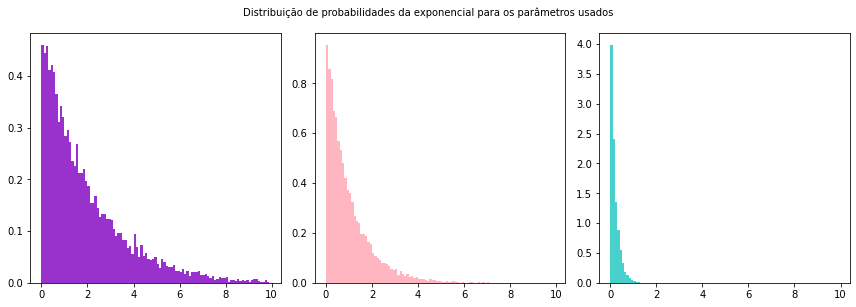

In [54]:
#Exponencial
#->muda a cada iteração

#Faz 10000 amostragens da distribuição exponencial para cada caso

sample1 = np.random.exponential(param.exp_beta[0], param.amostragem_grande)
sample2 = np.random.exponential(param.exp_beta[1], param.amostragem_grande)
sample3 = np.random.exponential(param.exp_beta[2], param.amostragem_grande)
bin = np.arange(0,10,0.1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

#Grafica as distribuições. As opções 'density' e 'stacked', combinadas, permitem 
#-> mostrar a distribuição de probabilidades
axs[0].hist(sample1, bins=bin, color='darkorchid', density=True, stacked=True) 
axs[1].hist(sample2, bins=bin, color='lightpink', density=True, stacked=True) 
axs[2].hist(sample3, bins=bin, color='mediumturquoise', density=True, stacked=True) 

fig.tight_layout()
fig.text(0.5, 1.025, 'Distribuição de probabilidades da exponencial para os parâmetros usados', ha='center')
plt.show()

## Q3. Calcule as 100 médias amostrais em cada situação

*Calcule as 100 médias amostrais em cada situação (de combinações dos parâmetros da distribuição com o tamanho amostral) e, graficamente, 
compare com a distribuição Normal de mesma média e variância igual a variância das observações geradas dividida por n (tamanho amostral).*

In [55]:
def CalcularMedias(res_amostras):
  '''
  Calcula as médias para cada uma das amostras geradas pela função GerarAmostragem()
  '''

  #cria o nome das colunas
  colunas = []
  for i in param.exp_tam:
    for j in param.exp:
      colunas.append('n' + ':' + str(i) + ',' + 'par' + ':' + str(j))

  df = pd.DataFrame()
  counter = 0   #essa variável facilita o acesso às colunas
  for tam in range(0,len(param.exp_tam),1):
    med_1 = []
    med_2 = []
    med_3 = []
    #aqui, dividimos em 3 intervalos para representar as variações de parametro
    #-> 0-100: lambda 0,5; 100-200: lambda 1 e 200-300: lambda 5.
    for col in range(0, 100, 1):
      med_1.append(res_amostras[tam].iloc[:, col].mean())
    for col in range(100, 200, 1):
      med_2.append(res_amostras[tam].iloc[:, col].mean())
    for col in range(200, 300, 1):
      med_3.append(res_amostras[tam].iloc[:, col].mean())

    #escreve o dataframe
    df.insert(counter, colunas[counter], med_1)
    df.insert(counter+1, colunas[counter+1], med_2)
    df.insert(counter+2, colunas[counter+2], med_3)
    counter = counter + 3

  return df

In [56]:
#Calcula as médias e mostra a tabela resultante
expo_mean = CalcularMedias(expo_all)
expo_mean

,"n:20,par:0.5","n:20,par:1","n:20,par:5","n:100,par:0.5","n:100,par:1","n:100,par:5","n:500,par:0.5","n:500,par:1","n:500,par:5","n:1000,par:0.5","n:1000,par:1","n:1000,par:5"
0,1.823891,0.778176,0.150400,1.851152,1.142847,0.179883,2.003744,1.043114,0.196225,1.995158,1.008453,0.200579
1,1.732022,1.094426,0.273373,1.900751,1.172096,0.167175,1.986076,1.018400,0.187459,1.990457,1.105403,0.197228
2,2.099149,0.968670,0.251375,2.051247,1.085984,0.193503,2.081368,0.966021,0.204117,2.118392,0.989110,0.205022
3,1.835909,1.046534,0.193971,1.909919,0.915390,0.199211,1.909288,0.952107,0.203902,2.065908,0.962716,0.190236
4,1.656510,0.982581,0.136132,2.124578,0.929394,0.224805,2.058343,0.986864,0.213505,1.999999,0.970809,0.204401
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.256621,1.060109,0.182158,1.883819,0.886911,0.189900,2.050504,1.027771,0.209027,1.976628,0.966664,0.197914
96,1.594519,1.003013,0.210784,2.183625,0.970342,0.166198,1.999472,1.005286,0.195727,1.985171,1.001259,0.196307
97,2.304432,0.902185,0.178609,1.735375,0.879735,0.181160,2.064280,0.965976,0.207065,1.966912,0.985758,0.200829
98,1.659389,0.807050,0.259185,1.725235,1.008856,0.223382,2.059320,1.009526,0.187811,1.865355,1.038071,0.186284


In [57]:
#salva essa tabela
expo_mean.to_csv('resultado-exponencial-medias.csv')

Agora, faz os gráficos.
A maneira que usei para calcular as gaussianas para cada gráfico está detalhada na função `CalculaGaussianas()` na aba **Funções**.

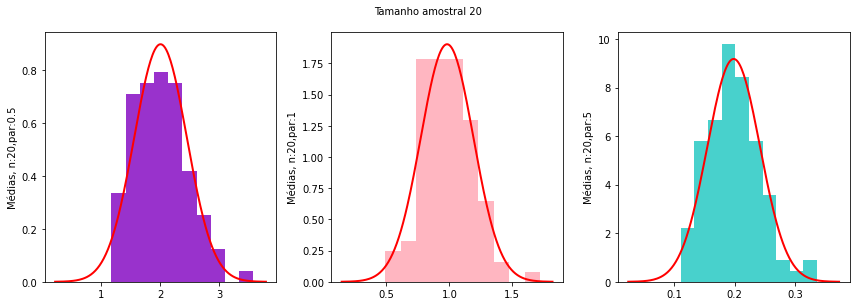

In [58]:
#Tamanho amostral 20
selec = [0,1,2]   #seleciona as colunas de 0 a 2, correspondentes às 3 variações de parâmetro no tamanho amostral 20
GraficaMediasEGaussianas(expo_mean, selec)

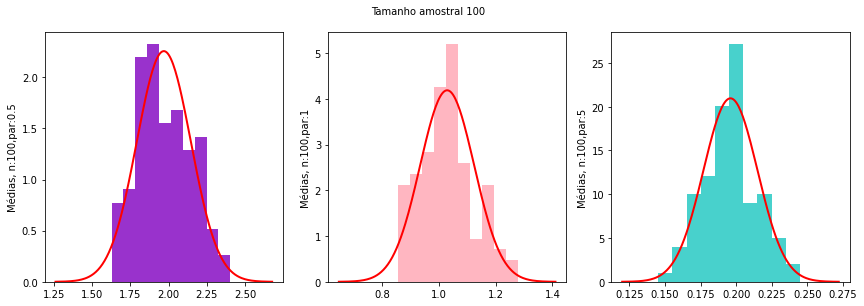

In [59]:
#Tamanho amostral 100
selec = [3,4,5]
GraficaMediasEGaussianas(expo_mean, selec)

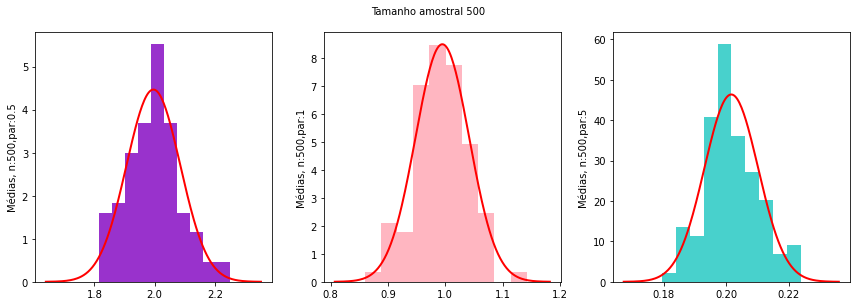

In [60]:
#Tamanho amostral 500
selec = [6,7,8]
GraficaMediasEGaussianas(expo_mean, selec)

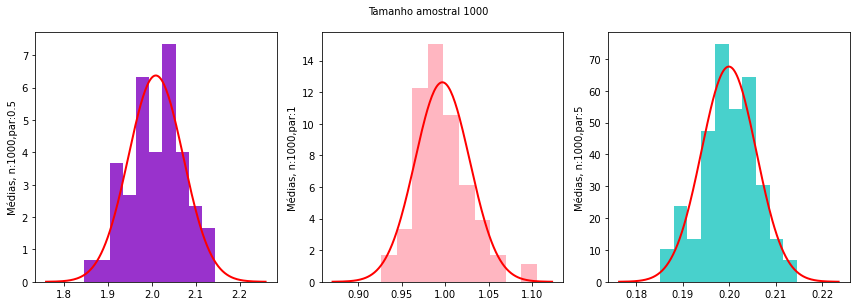

In [61]:
#Tamanho amostral 1000
selec = [9,10,11]
GraficaMediasEGaussianas(expo_mean, selec)

## Q4. Intervalos de confiança

*Simule os intervalos de confiança para a média em cada uma das 100 amostras geradas no exercício anterior e entenda o significado do nível de confiança.*

In [62]:
#Define a função para o cálculo de intervalos de confiança
def IntervaloDeConfiancaMedia(data, confianca=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.sem(a)
    #Cria o intervalo de confiança a partir da distribuição de Student
    h = se * sp.t.ppf((1 + confianca) / 2., n-1)
    return m, m-h, m+h

In [63]:
def GuardaValoresConfianca(df, amostragem_escolhida, confianca):
  '''
  Calcula os intervalos de confiança para cada uma das amostragens utilizando
  a função anterior.

  amostragem_escolhida é a entrada do dataframe correspondente ao tamanho de 
  amostras que queremos estudar.

  'Maior' e 'Menor' correspondem aos maiores e menores, respectivamente, valores
  que estão dentro do intervalo de confiança escolhido. 
  ---> os números que seguem estas palavras são os valores de lambda para a exponencial.
  '''

  medias1 = []
  medias_menor1 = []
  medias_maior1 = []

  medias2 = []
  medias_menor2 = []
  medias_maior2 = []

  medias3 = []
  medias_menor3 = []
  medias_maior3 = []

  #aqui, dividimos em 3 intervalos para representar as variações de parametro,
  #assim como feito na função de cálculo de médias
  for col in range(0, 100, 1):
    m0, m1, m2 = IntervaloDeConfiancaMedia(df[amostragem_escolhida].iloc[:, col], confianca)
    medias1.append(m0)
    medias_menor1.append(m1)
    medias_maior1.append(m2)

  for col in range(100, 200, 1):
    m0, m1, m2 = IntervaloDeConfiancaMedia(df[amostragem_escolhida].iloc[:, col], confianca)
    medias2.append(m0)
    medias_menor2.append(m1)
    medias_maior2.append(m2)

  for col in range(200, 300, 1):
    m0, m1, m2 = IntervaloDeConfiancaMedia(df[amostragem_escolhida].iloc[:, col], confianca)
    medias3.append(m0)
    medias_menor3.append(m1)
    medias_maior3.append(m2)

  #cria o dataframe
  d = {'Menor, 0.5': medias_menor1, 'Médias, 0.5': medias1, 'Maior, 0.5': medias_maior1,
       'Menor, 1': medias_menor2, 'Médias, 1': medias2, 'Maior, 1': medias_maior2,
       'Menor, 5': medias_menor3, 'Médias, 5': medias3, 'Maior, 5': medias_maior3}
  df_conf = pd.DataFrame(data=d)

  return df_conf

In [64]:
#Tamanho amostral = 20
expo_confianca_20 = GuardaValoresConfianca(df=expo_all, amostragem_escolhida=0, confianca=0.95)
expo_confianca_20

,"Menor, 0.5","Médias, 0.5","Maior, 0.5","Menor, 1","Médias, 1","Maior, 1","Menor, 5","Médias, 5","Maior, 5"
0,0.902494,1.823891,2.745287,0.404726,0.778176,1.151626,0.086188,0.150400,0.214613
1,0.872596,1.732022,2.591448,0.510093,1.094426,1.678758,0.141231,0.273373,0.405515
2,1.097871,2.099149,3.100427,0.624082,0.968670,1.313258,0.144459,0.251375,0.358290
3,0.883826,1.835909,2.787993,0.562439,1.046534,1.530630,0.110425,0.193971,0.277517
4,1.073663,1.656510,2.239356,0.589331,0.982581,1.375831,0.069671,0.136132,0.202593
...,...,...,...,...,...,...,...,...,...
95,1.007106,2.256621,3.506136,0.557771,1.060109,1.562448,0.091321,0.182158,0.272994
96,1.107357,1.594519,2.081682,0.452059,1.003013,1.553967,0.103919,0.210784,0.317650
97,0.997320,2.304432,3.611544,0.405359,0.902185,1.399010,0.096655,0.178609,0.260562
98,0.915383,1.659389,2.403394,0.397070,0.807050,1.217031,0.164967,0.259185,0.353402


In [65]:
#Salva essa tabela
expo_confianca_20.to_csv("resultado-exponencial-confianca-tam_20.csv")

In [66]:
#Tamanho amostral = 100
expo_confianca_100 = GuardaValoresConfianca(df=expo_all, amostragem_escolhida=1, confianca=0.95)
expo_confianca_100

,"Menor, 0.5","Médias, 0.5","Maior, 0.5","Menor, 1","Médias, 1","Maior, 1","Menor, 5","Médias, 5","Maior, 5"
0,1.519971,1.851152,2.182334,0.900022,1.142847,1.385671,0.143330,0.179883,0.216435
1,1.434563,1.900751,2.366938,0.930122,1.172096,1.414071,0.132918,0.167175,0.201431
2,1.679076,2.051247,2.423419,0.856964,1.085984,1.315004,0.160352,0.193503,0.226655
3,1.550623,1.909919,2.269214,0.730662,0.915390,1.100117,0.155035,0.199211,0.243388
4,1.696392,2.124578,2.552763,0.754785,0.929394,1.104003,0.172932,0.224805,0.276678
...,...,...,...,...,...,...,...,...,...
95,1.545609,1.883819,2.222029,0.707347,0.886911,1.066476,0.151746,0.189900,0.228054
96,1.707321,2.183625,2.659929,0.780230,0.970342,1.160454,0.136285,0.166198,0.196112
97,1.356255,1.735375,2.114495,0.705942,0.879735,1.053528,0.147175,0.181160,0.215146
98,1.389450,1.725235,2.061021,0.816376,1.008856,1.201337,0.177576,0.223382,0.269189


In [67]:
#Salva essa tabela
expo_confianca_100.to_csv("resultado-exponencial-confianca-tam_100.csv")

In [68]:
#Tamanho amostral = 500
expo_confianca_500 = GuardaValoresConfianca(df=expo_all, amostragem_escolhida=2, confianca=0.95)
expo_confianca_500

,"Menor, 0.5","Médias, 0.5","Maior, 0.5","Menor, 1","Médias, 1","Maior, 1","Menor, 5","Médias, 5","Maior, 5"
0,1.827035,2.003744,2.180453,0.951602,1.043114,1.134625,0.179735,0.196225,0.212714
1,1.796794,1.986076,2.175358,0.926984,1.018400,1.109816,0.171725,0.187459,0.203193
2,1.912609,2.081368,2.250127,0.881307,0.966021,1.050736,0.186117,0.204117,0.222117
3,1.744715,1.909288,2.073861,0.871375,0.952107,1.032839,0.185668,0.203902,0.222135
4,1.885047,2.058343,2.231639,0.898024,0.986864,1.075704,0.195727,0.213505,0.231283
...,...,...,...,...,...,...,...,...,...
95,1.881566,2.050504,2.219442,0.935723,1.027771,1.119819,0.189438,0.209027,0.228616
96,1.827849,1.999472,2.171095,0.918262,1.005286,1.092310,0.177896,0.195727,0.213559
97,1.874317,2.064280,2.254242,0.882409,0.965976,1.049543,0.189024,0.207065,0.225106
98,1.878972,2.059320,2.239668,0.916587,1.009526,1.102465,0.171182,0.187811,0.204441


In [69]:
#Salva essa tabela
expo_confianca_500.to_csv("resultado-exponencial-confianca-tam_500.csv")

In [70]:
#Tamanho amostral = 100
expo_confianca_1000 = GuardaValoresConfianca(df=expo_all, amostragem_escolhida=3, confianca=0.95)
expo_confianca_1000

,"Menor, 0.5","Médias, 0.5","Maior, 0.5","Menor, 1","Médias, 1","Maior, 1","Menor, 5","Médias, 5","Maior, 5"
0,1.868077,1.995158,2.122239,0.945469,1.008453,1.071438,0.187815,0.200579,0.213343
1,1.872812,1.990457,2.108102,1.036250,1.105403,1.174555,0.185165,0.197228,0.209291
2,1.989395,2.118392,2.247388,0.923804,0.989110,1.054417,0.192458,0.205022,0.217586
3,1.939652,2.065908,2.192164,0.903455,0.962716,1.021977,0.179065,0.190236,0.201408
4,1.876753,1.999999,2.123246,0.908115,0.970809,1.033503,0.191876,0.204401,0.216926
...,...,...,...,...,...,...,...,...,...
95,1.855485,1.976628,2.097770,0.905645,0.966664,1.027683,0.186163,0.197914,0.209664
96,1.861212,1.985171,2.109131,0.940574,1.001259,1.061943,0.184196,0.196307,0.208417
97,1.844019,1.966912,2.089805,0.924762,0.985758,1.046755,0.187567,0.200829,0.214091
98,1.750516,1.865355,1.980194,0.973513,1.038071,1.102630,0.175478,0.186284,0.197090


In [71]:
#Salva essa tabela
expo_confianca_1000.to_csv("resultado-exponencial-confianca-tam_1000.csv")

**Interpretação**: o nível de confiança estima os intervalos onde o real valor de uma dada variável estará contido. Na taxa escolhida acima, de $95\%$, podemos dizer que essa taxa da amostragem conterá o real valor da média que deve ser observada para cada uma das simulações da exponencial.